In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
def assignment(df, centroids, colmap):
    for i in centroids.keys():
        # distance 获取每个样本点到聚类中心的距离
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2
            )
        )
    # color
    distance_from_centroid_id = ['distance_from_{}'.format(i) for i in centroids.keys()]   # 获取每个样本点到聚类中心的距离的index
    df['closest'] = df.loc[:, distance_from_centroid_id].idxmin(axis = 1)  # 获取每个样本点到聚类中心的最小距离的index，添加 closest列
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))  # 删掉closest列的元素名字中的distance_from_，保留数字
    df['color'] = df['closest'].map(lambda x: colmap[x])   # 添加 color列
    return df

In [4]:
def update(df, centroids):
    # recaculate the centroids
    # 把分配好的样本点在本类当中重新计算中心点
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])  
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return centroids

In [5]:
def main():
    # 
    # 返回类似excel的二维矩阵
    df = pd.DataFrame({
        'x':[12, 20, 28, 18, 10, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72, 23],
        'y':[39, 36, 30, 52, 54, 20, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24, 77]
    })
    
    k = 3
    
    # randomly choose centroids
    centroids = {
        i: [np.random.randint(0, 80), np.random.randint(0, 80)] for i in range(k)
    }
    colmap = {0: 'r', 1: 'g', 2: 'b'}
    df = assignment(df, centroids, colmap)
    
    plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5, edgecolor = 'k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color = colmap[i], linewidths = 6)
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.show()
    
    for i in range(10):
        #plt.close()
        
        closest_centroids = df['closest'].copy(deep = True)
        centroids = update(df, centroids)
        
        plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5, edgecolor = 'k')
        for i in centroids.keys():
            plt.scatter(*centroids[i], color = colmap[i], linewidths = 6)
        plt.xlim(0, 80)
        plt.ylim(0, 80)
        plt.show()
        
        df = assignment(df, centroids, colmap)
        
        if closest_centroids.equals(df['closest']):
            break
    

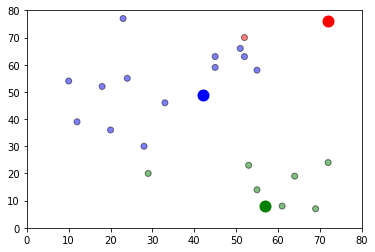

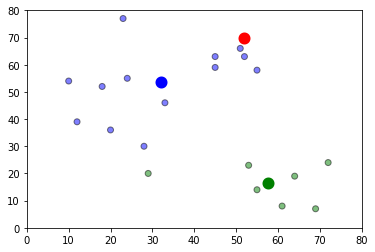

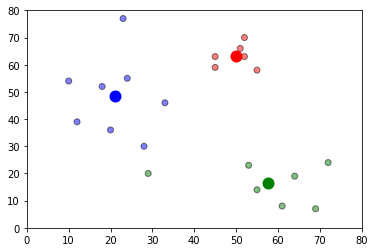

In [10]:
if __name__ == '__main__':
    main()